In [ ]:
!pip install pandas
!pip install matplotlib
!pip install tensorflow

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import activations
from keras import layers,models,Sequential

2025-02-15 16:50:03.083453: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-15 16:50:03.099769: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-15 16:50:03.233059: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-15 16:50:03.360740: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739613003.486339    1227 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739613003.52

In [2]:
# Path to the file
file_path = './output/frame_trajectory.txt'

# Read the space-separated txt file into a DataFrame
df = pd.read_table(file_path, delim_whitespace=True, header=None, 
                   names=['timestamp', 'x', 'y', 'z', 'qx', 'qy', 'qz', 'qw'])

# Print the first 10 values of x, y, z columns
print(df[['timestamp','x', 'y', 'z']].head(3))


   timestamp         x         y         z
0   0.000000 -0.000000 -0.000000 -0.000000
1   0.166834  0.000088 -0.000263  0.014065
2   0.200200 -0.000816  0.000262  0.017842


/tmp/ipykernel_1227/829478411.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(file_path, delim_whitespace=True, header=None,


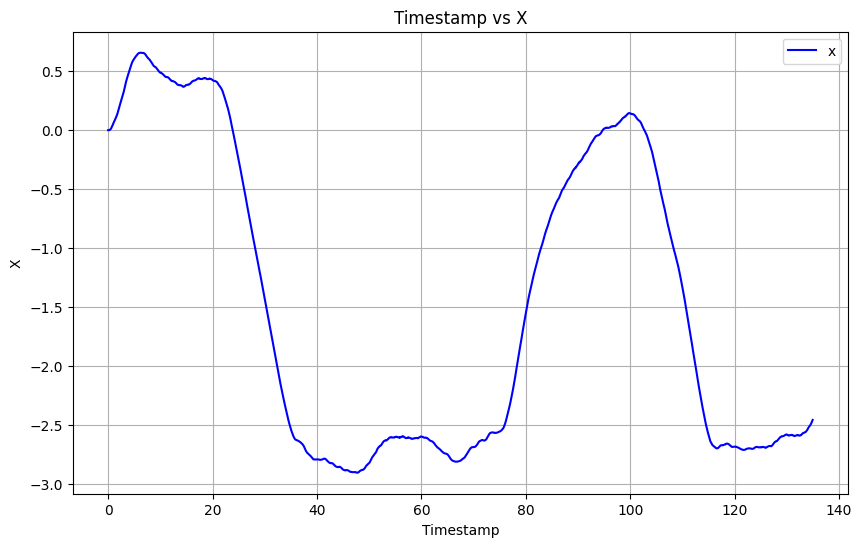

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['x'], label='x', color='b')
plt.xlabel('Timestamp')
plt.ylabel('X')
plt.title('Timestamp vs X')
plt.grid(True)
plt.legend()
plt.show()

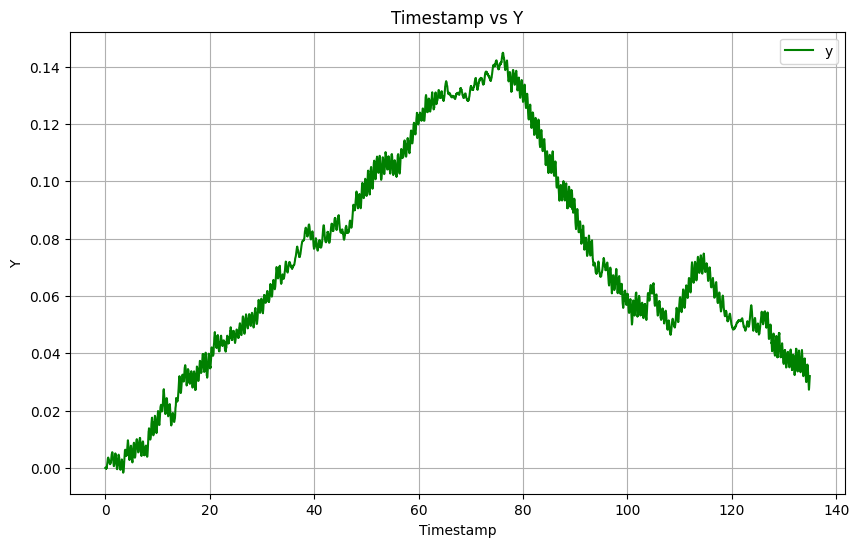

In [6]:
# Plot timestamp vs y
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['y'], label='y', color='g')
plt.xlabel('Timestamp')
plt.ylabel('Y')
plt.title('Timestamp vs Y')
plt.grid(True)
plt.legend()
plt.show()


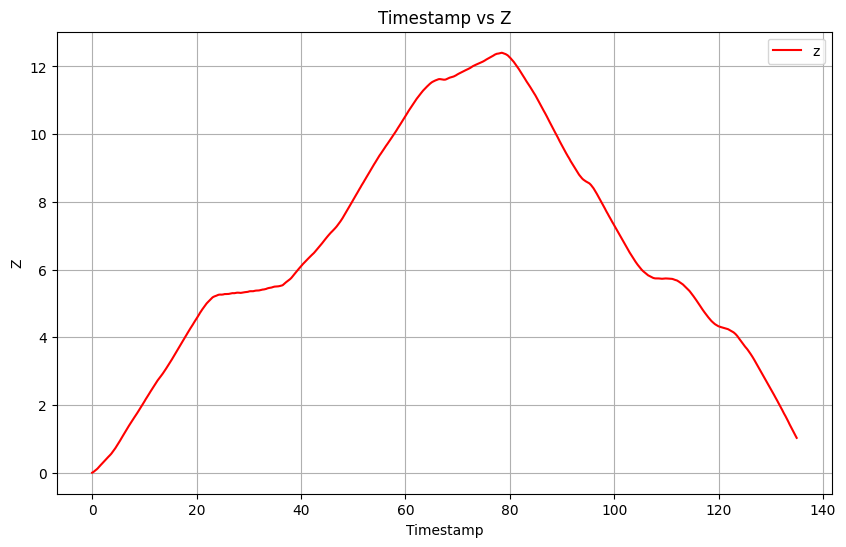

In [4]:
# Plot timestamp vs z
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['z'], label='z', color='r')
plt.xlabel('Timestamp')
plt.ylabel('Z')
plt.title('Timestamp vs Z')
plt.grid(True)
plt.legend()
plt.show()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                  │ (None, 64, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,529 (244.25 KB)

 Trainable params: 62,529 (244.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.9144
Epoch 2/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0013
Epoch 3/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 5.9875e-04
Epoch 4/4
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 3.9548e-04
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


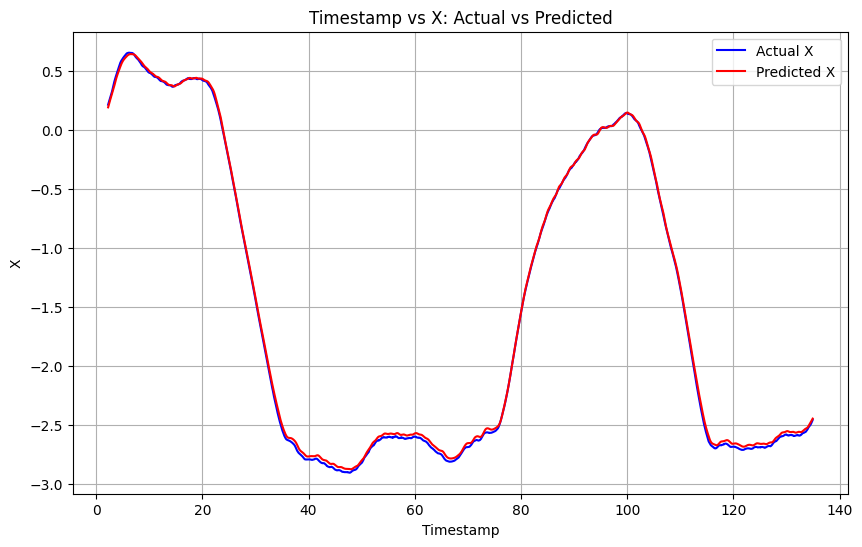

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'timestamp' and 'x' columns
timestamps = df['timestamp'].values
x_values = df['x'].values

# Reshape data to have 32 timesteps
def create_sequences(data, timesteps):
    X = []
    for i in range(len(data) - timesteps):
        X.append(data[i:i+timesteps])
    return np.array(X)

timesteps = 64
X = create_sequences(x_values, timesteps)
y = x_values[timesteps:]

# Reshape X to be (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define the model
model = Sequential([
    keras.layers.LSTM(64, return_sequences=True, input_shape=(timesteps, 1)),
    keras.layers.LSTM(64),
    keras.layers.Dense(64, activation='softplus'),
    keras.layers.Dense(128, activation='softplus'),
    keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse')

model.summary()

# Train the model
model.fit(X, y, epochs=4, batch_size=32)

# Predict
predictions = model.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(timestamps[timesteps:], y, label='Actual X', color='b')
plt.plot(timestamps[timesteps:], predictions, label='Predicted X', color='r')
plt.xlabel('Timestamp')
plt.ylabel('X')
plt.title('Timestamp vs X: Actual vs Predicted')
plt.grid(True)
plt.legend()
plt.show()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 4, 32)          │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,793 (163.25 KB)

 Trainable params: 41,793 (163.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/4
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0011
Epoch 2/4
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.0210e-06
Epoch 3/4
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.1275e-06
Epoch 4/4
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.4681e-06
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


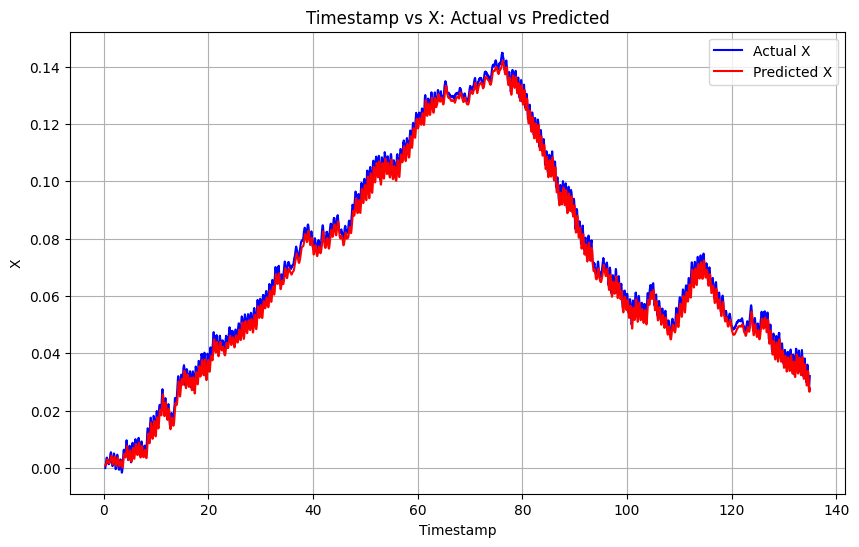

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'timestamp' and 'x' columns
timestamps = df['timestamp'].values
y_values = df['y'].values

# Reshape data to have 32 timesteps
def create_sequences(data, timesteps):
    X = []
    for i in range(len(data) - timesteps):
        X.append(data[i:i+timesteps])
    return np.array(X)

timesteps = 4
X = create_sequences(y_values, timesteps)
y = y_values[timesteps:]

# Reshape X to be (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define the model
model = Sequential([
    keras.layers.LSTM(32, return_sequences=True, input_shape=(timesteps, 1)),
    keras.layers.LSTM(64),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse')

model.summary()

# Train the model
model.fit(X, y, epochs=4, batch_size=32)

# Predict
predictions = model.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(timestamps[timesteps:], y, label='Actual X', color='b')
plt.plot(timestamps[timesteps:], predictions, label='Predicted X', color='r')
plt.xlabel('Timestamp')
plt.ylabel('X')
plt.title('Timestamp vs X: Actual vs Predicted')
plt.grid(True)
plt.legend()
plt.show()

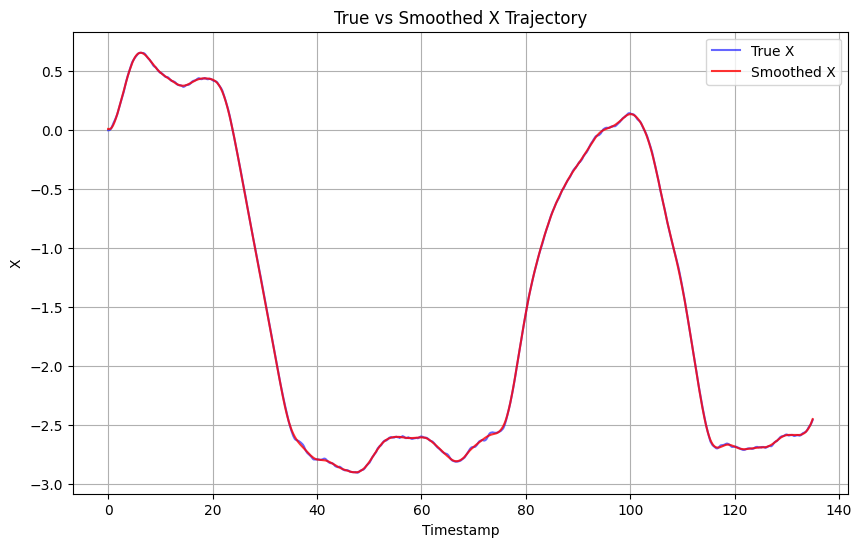

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Assuming you have your DataFrame df with a column 'x' for the trajectory data
x_values = df['x'].values  # Replace with your actual 'x' values from DataFrame

# Apply the Savitzky-Golay filter to smooth the data
# window_length is the size of the filter window (it should be an odd number)
# polyorder is the order of the polynomial used to fit the filter
smoothed_x = savgol_filter(x_values, window_length=256, polyorder=4)

# Plot the original (true) data vs. the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], x_values, label='True X', color='b', alpha=0.6)  # Original data
plt.plot(df['timestamp'], smoothed_x, label='Smoothed X', color='r', alpha=0.8)  # Smoothed data
plt.xlabel('Timestamp')
plt.ylabel('X')
plt.title('True vs Smoothed X Trajectory')
plt.legend()
plt.grid(True)
plt.show()
